In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import meta_variables as mv
from scipy.interpolate import interp2d

In [3]:
this_path = os.getcwd()
sec_rad_path = this_path.split('scripts')[0]
e_spec_path = sec_rad_path + 'electron_spectrum/'
spec_name = '0001_electron_spectrum.npy'
bins_name = '0001_electron_spectrum_bins.npy'

In [4]:
espec = np.load(e_spec_path + spec_name)
bins = np.load(e_spec_path + bins_name)
print(espec.shape)
print(bins.shape)
print(bins[0])
print(bins[-1])


(299,)
(300,)
0.0005116917305367494
39.19712323406537


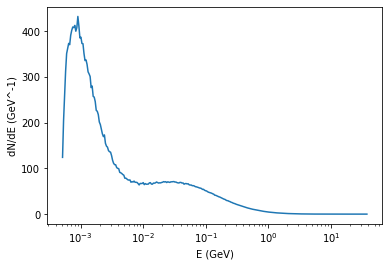

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(bins[:-1], espec)
ax.set_xscale('log')
plt.xlabel('E (GeV)')
plt.ylabel('dN/dE (GeV^-1)')
plt.savefig(sec_rad_path+'figs/espec_raw_histogram_check.pdf')

In [7]:
me = 5.11e-4
mx = 50
nr = 800
rr_log, EE_log, _, _ = mv.grid(800, 400, [0, 50000], [me, mx], E_spacing='log')
rr_lin, EE_lin, _, _ = mv.grid(800, 400, [0, 50000], [me, mx], E_spacing='lin')
u_lin = np.load(sec_rad_path + 'equillibrium_distribution/0001_equillibrium_distribution.npy')
u_log = np.load(sec_rad_path + 'equillibrium_distribution/0001_temporary_equillibrium_distribution.npy')
rv_lin = rr_lin[0]
Ev_lin = EE_lin[:, 0]
rv_log = rr_log[0]
Ev_log = EE_log[:, 0]
log_f_lin = interp2d(rv_lin, Ev_lin, np.log(u_lin/rr_lin), kind='cubic')
log_f_log = interp2d(rv_log, Ev_log, np.log(u_log/rr_log), kind='cubic')

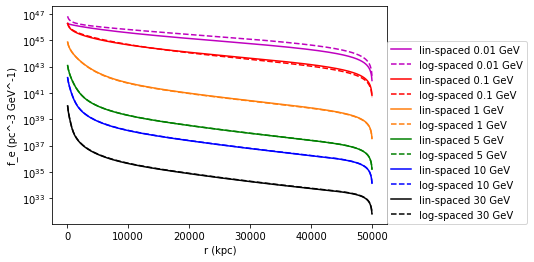

In [15]:
E0 = [.01, .1, 1, 5, 10, 30]
colors = ['m', 'r', 'tab:orange', 'g', 'b', 'k']
fig = plt.figure()
ax = fig.add_subplot()
for i in range(len(E0)):
    ax.plot(rv_lin, np.exp(log_f_lin(rv_lin, E0[i])), color=colors[i], linestyle='-', label='lin-spaced '+ str(E0[i])+ ' GeV')
    ax.plot(rv_log, np.exp(log_f_log(rv_log, E0[i])), color=colors[i], linestyle = '--', label='log-spaced ' + str(E0[i]) + ' GeV')
ax.set_yscale('log')
plt.xlabel('r (kpc)')
plt.ylabel('f_e (pc^-3 GeV^-1)')
plt.legend(loc=(1,0))
plt.savefig(sec_rad_path+'figs/compare_lintolog_diff_loss.pdf')